In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()  #mnist contains the handwritten number0-9

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

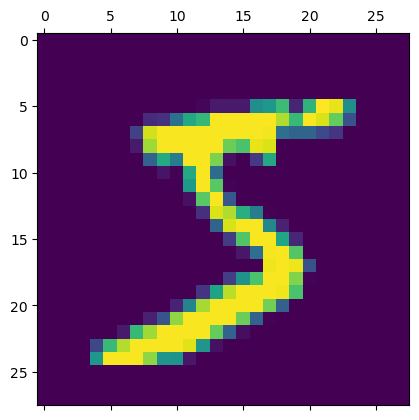

In [7]:
plt.matshow(x_train[0])

In [8]:
x_train=x_train / 255        #scalling 0-1

In [9]:
x_test=x_test / 255

In [10]:
x_train_flattened=x_train.reshape(len(x_train),28*28) # reshape change the dimension from (60000,28,28) to (60000,784) for the 1st neaural_layer
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flattened.shape

(60000, 784)

In [12]:
x_test_flattened.shape

(10000, 784)

In [13]:
x_train_flattened[0] #become the single dimensional array for the 1st neaural layer

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


C:\Users\pritc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8160 - loss: 0.7107
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9151 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9214 - loss: 0.2799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.2697  
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9274 - loss: 0.2645


In [15]:
model.evaluate(x_test_flattened,y_test)  #evaluate accuracy through test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9148 - loss: 0.3034


[0.267429381608963, 0.9258999824523926]

In [16]:
y_predicted=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


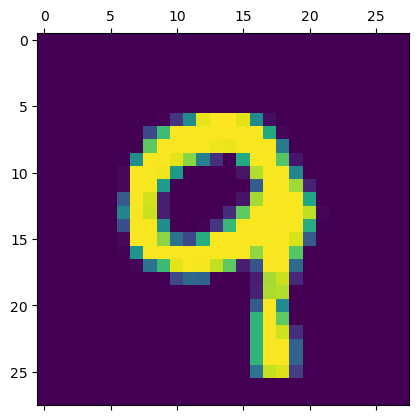

In [17]:
plt.matshow(x_test[99])

In [18]:
y_predicted[0]

array([3.5047181e-02, 5.1969408e-07, 6.9505341e-02, 9.6203089e-01,
       3.0235588e-03, 1.3475287e-01, 2.2001238e-06, 9.9985188e-01,
       1.3114373e-01, 7.1048439e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[99])

9

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]   #get the array of result 
y_predicted_labels[:5]   #first 5 prediction

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]  # first 5 actual test data

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    6,    5,    3,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  925,   14,    8,    5,   13,   11,   37,    2],
       [   4,    0,   19,  908,    0,   35,    2,   12,   23,    7],
       [   1,    1,    7,    1,  909,    0,   10,    4,   10,   39],
       [   8,    2,    2,   21,    7,  799,   13,    6,   28,    6],
       [  10,    3,    5,    1,    7,   18,  910,    2,    2,    0],
       [   1,    6,   26,    6,    7,    0,    0,  949,    2,   31],
       [   7,    7,    7,   17,    9,   34,    9,   11,  866,    7],
       [  11,    7,    1,   10,   26,    7,    0,   24,    6,  917]])>

Text(95.72222222222221, 0.5, 'truth')

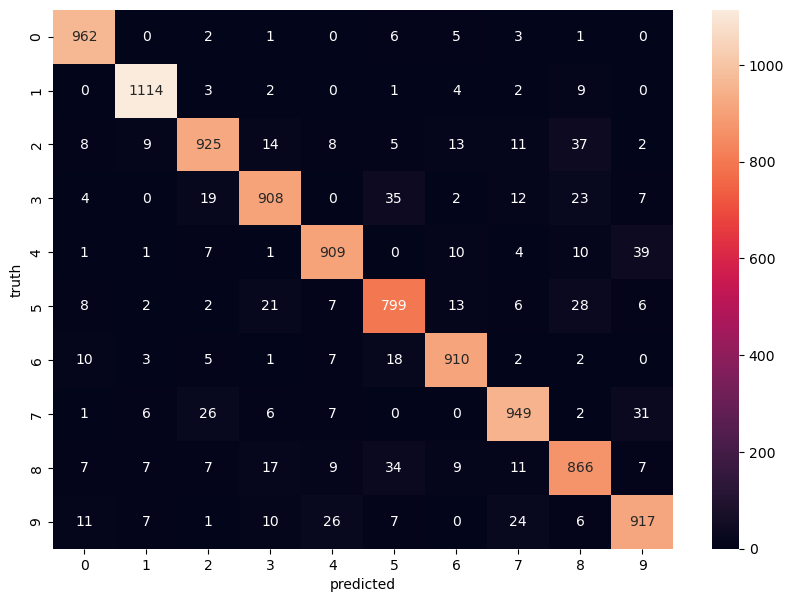

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [24]:
#963 times it predited 0 as 0 (means correct), but 6 times it predict 0 as 6 ,2 times 0 as 3, ...... 10 times 0 as 9
#black box values are errors

In [25]:
###Adding hidden layer:

In [26]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened , y_train ,epochs=5)

    

C:\Users\pritc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8742 - loss: 0.4458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9621 - loss: 0.1311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9858 - loss: 0.0490


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9686 - loss: 0.0965


[0.08208785206079483, 0.9736999869346619]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


Text(95.72222222222221, 0.5, 'truth')

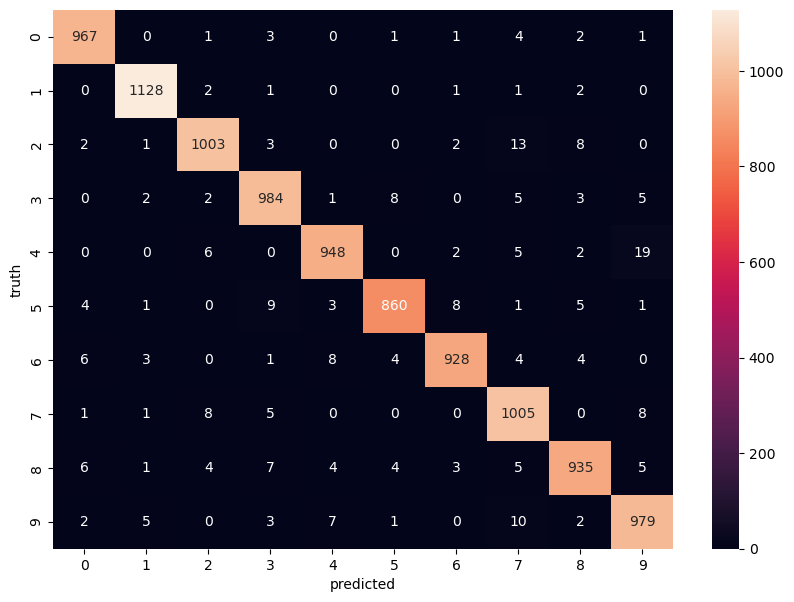

In [28]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

#result after adding hidden layer 
#errors are minimized

In [29]:
#if u don't wanna transform to flattened array
#tf/keras provides the function(Flatten)

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train ,epochs=5)

C:\Users\pritc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8730 - loss: 0.4548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9743 - loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9795 - loss: 0.0698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0498


In [30]:
#let's predict own handwritten number from paint

In [31]:
from PIL import Image            #fr displaying handwritten image
image_path = 'num_2.png'
img = Image.open(image_path)

# Display the image
img.show()

In [32]:
from PIL import Image

# Load the handwritten number image
image_path = 'num_2.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale

In [33]:
# Preprocess the image
img = img.resize((28, 28))                 # Resize to 28x28 pixels
img_array = np.array(img)                  # Convert to numpy array
img_array = 255 - img_array                
img_array = img_array / 255.0              # Normalizing image to 0-1
img_array = img_array.reshape(1, 28, 28, 1)  # change the dimensions

In [34]:
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digit: 2


In [35]:
#it predicted correctly

In [36]:
#let's do this for 3
from PIL import Image
image_path = 'num_3.png'
img = Image.open(image_path).convert('L') 

img = img.resize((28, 28))                
img_array = np.array(img)                 
img_array = 255 - img_array                
img_array = img_array / 255.0              
img_array = img_array.reshape(1, 28, 28, 1) 
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 3
